In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels import PanelOLS, PooledOLS
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(style = 'darkgrid')

In [5]:
bloomberg = pd.read_csv("C:/Users/Kacper/OneDrive/Dokumenty/Licencjat/NordicsandBalticsIPOs6.csv",sep = ";")
bloomberg

,year,Primary Exchange,Offer Size (M),Averege Offer Price,Offer To Date Average,Last Close Average,Last Price Average,Sum Offer Size (M),Sum Offer Price,Sum Offer To Date,Sum Last Price,Sum of IPOs,Sum Same Market IPO,Foregin Market IPO
0,2011,BD,2.579239,2.210000,NaN,NaN,NaN,0.431479,2.13,0.000000,0.0000,3,0,3
1,2012,BD,32.428756,2.283333,NaN,NaN,NaN,0.863000,1.50,0.000000,0.0000,3,0,3
2,2013,BD,1176.447450,142.888889,NaN,NaN,NaN,1.284760,3.00,0.000000,0.0000,9,0,9
3,2014,BD,3085.569880,51.000000,NaN,0.1785,0.179,1.339090,3.20,-89.381060,0.0992,14,0,14
4,2015,BD,1962.017912,20.504286,NaN,NaN,NaN,0.000000,0.00,0.000000,34.6000,14,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2018,FN Iceland,0.000000,NaN,NaN,NaN,NaN,3.601420,14.00,3206.428571,92.9000,0,0,0
197,2019,FN Iceland,0.000000,NaN,NaN,NaN,NaN,3.886250,6.40,799.562914,49.9600,0,0,0
198,2020,FN Iceland,0.000000,NaN,NaN,NaN,NaN,3.968430,3.50,-98.166971,0.0510,0,0,0
199,2021,FN Iceland,15.396820,15.250000,-3.466667,15.0000,15.000,4.011240,3.10,19.354839,4.0500,2,2,0


In [6]:
for col in bloomberg:
    print(col)

year
Primary Exchange
Offer Size (M)
Averege Offer Price
Offer To Date Average
Last Close Average
Last Price Average
Sum Offer Size (M)
Sum Offer Price
Sum Offer To Date
Sum Last Price
Sum of IPOs
Sum Same Market IPO
Foregin Market IPO


<Figure size 1728x1152 with 0 Axes>

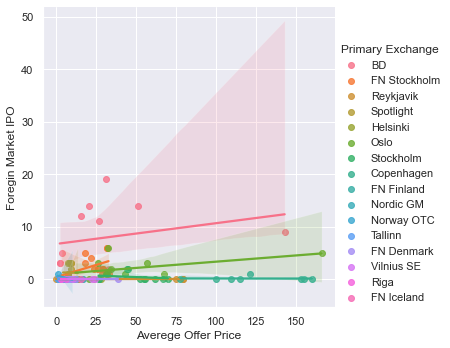

In [7]:
fig = plt.gcf()
fig.set_size_inches(24, 16)
sns.lmplot(x='Averege Offer Price', y='Foregin Market IPO', 
        hue='Primary Exchange', data = bloomberg);
plt.show()


In [8]:
exog = sm.tools.tools.add_constant(bloomberg['Foregin Market IPO'])
endog = bloomberg['Averege Offer Price']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

ValueError: Series can only be used with a 2-level MultiIndex